In [1]:
import os
import glob
import sys
import importlib
import enum
import warnings
import copy
import time
import math
import json

import tifffile as tiff
import scipy.ndimage as ndi
import numpy as np
import pyqtgraph as pg

from collections import deque
from datetime import datetime
from inspect import signature
from qtpy import QtCore
from PyQt5 import QtWidgets

In [4]:
def loadSetupJson(filepath=None):
    """ Load a setup from a json file. """
    if filepath is None:
        filepath = QtWidgets.QFileDialog.getOpenFileName(caption='Load etMINFLUX setup info', filter='JSON files (*.json)')[0]
    with open(filepath, 'r') as f:
        setup_dict = json.load(f)
    return setup_dict

In [22]:
setupInfo = loadSetupJson(filepath='etMINFLUX_setup.json')

In [23]:
setupInfo.get('analysis_settings')

{'initial_frames_def': 0,
 'analysis_period_lines_def': 100,
 'analysis_confocal_frame_pause_def': 10,
 'binary_pos_thresh_def': 10,
 'binary_pos_smooth_def': 2.0,
 'binary_neg_thresh_def': 10,
 'binary_neg_smooth_def': 2.0,
 'binary_border_size_def': 15}

In [14]:
import tifffile as tiff
import numpy as np
import os
from tkinter.filedialog import askopenfilename
from collections import deque
import matplotlib.pyplot as plt

confocal_data_file = askopenfilename(title='Select folder...')
imstacktiff = tiff.imread(confocal_data_file)

In [64]:
np.shape(imstacktiff)
imdeque = deque()
for img in imstacktiff:
    imdeque.append(img)
imsums = []

15
[9.976921052631578, 10.356921052631579, 10.2285, 10.26713157894737, 10.0545, 10.091947368421053, 9.9855, 10.054210526315789, 9.948, 9.862368421052631, 9.958842105263157, 9.846763157894737, 9.767447368421053, 9.795921052631579, 9.692421052631579, 9.976921052631578, 10.356921052631579, 10.2285, 10.26713157894737, 10.0545]


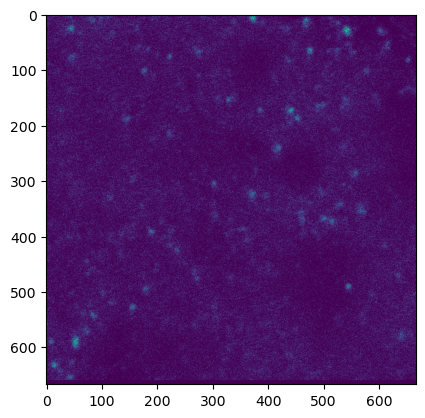

In [84]:
currimg = imdeque.popleft()
plt.imshow(currimg)
imdeque.append(currimg)
print(len(imdeque))
imsums.append(np.sum(currimg)/38000)
print(imsums)